In [70]:
import matplotlib.pyplot as plt
import cirq_ionq
import random
import cirq
from cirq.contrib.svg import SVGCircuit

In [37]:
def diffuse(circuit, n, qubits):
    for _ in range(n):
        circuit.append([cirq.H(qubit) for qubit in qubits])
        circuit.append([cirq.X(qubit) for qubit in qubits])
        circuit.append(cirq.Z(qubits[-1]).controlled_by(*qubits[0:-1]))
        circuit.append([cirq.X(qubit) for qubit in qubits])
        circuit.append([cirq.H(qubit) for qubit in qubits])

In [71]:
def build_monster_grover(exponents, nDiffuse, measure):
    qubits = [cirq.NamedQubit(str(ii)) for ii in range(4)]
    circuit = cirq.Circuit()

    # apply H-gates 
    circuit.append([cirq.H(qubit) for qubit in qubits])

    circuit.append(cirq.CZPowGate(exponent = exponents[0])(qubits[0], qubits[1]))
    circuit.append(cirq.CZPowGate(exponent = exponents[1])(qubits[0], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[2])(qubits[0], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[3])(qubits[1], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[4])(qubits[1], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[5])(qubits[2], qubits[3]))

    circuit.append([cirq.X(qubit) for qubit in qubits])
    
    circuit.append(cirq.CZPowGate(exponent = exponents[6])(qubits[0], qubits[1]))
    circuit.append(cirq.CZPowGate(exponent = exponents[7])(qubits[0], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[8])(qubits[0], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[9])(qubits[1], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[10])(qubits[1], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[11])(qubits[2], qubits[3]))
    
    diffuse(circuit, nDiffuse, qubits)
    
    if measure:
        circuit.append(cirq.measure(*qubits, key = 'r1'))
    
    return circuit

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

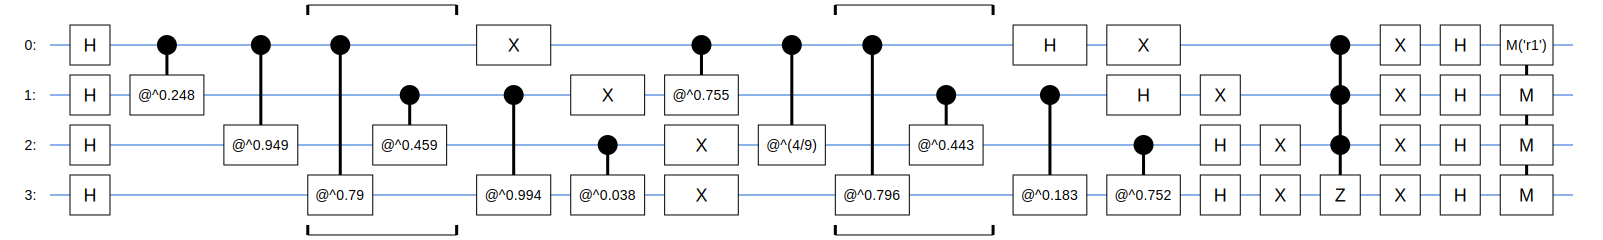

In [72]:
exponents = [random.random() for _ in range(numExponents)]
circuit = build_monster_grover(exponents, nDiffuse=1, measure=True)
SVGCircuit(circuit)

In [104]:
# Optimization parameters
# threshold = 60 # accept percentage
numIts = 2000
random_sample = [0,1,2,3]
iterations = []
accuracy = []

[ 2.4 12.4  7.5  7.4  2.1  3.6  9.9  8.4  6.   3.4  3.9  1.8 11.6  1.7
  6.3 11.6]


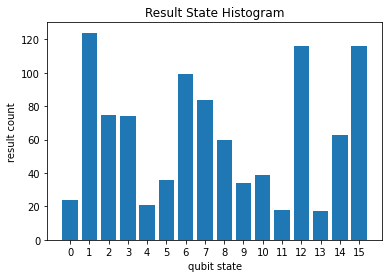

In [105]:
numExponents = 12
numRepititions = 1000
exponents = [random.random() for _ in range(numExponents)]
nDiffuse = 1

# initial circuit
circuit = build_monster_grover(exponents, nDiffuse, measure=True)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = numRepititions)
cirq.plot_state_histogram(samples, plt.subplot())

counts = cirq.get_state_histogram(samples)
percentages = counts/numRepititions * 100
print(percentages)
# list(cirq.get_state_histogram(samples))
prev_prob_sum = sum(percentages[i] for i in random_sample)

In [106]:
# update exponents by a small step randomly
updates = [random.random()/10 - 0.05 for _ in range(len(exponents))]

circuit = build_monster_grover([exponents[ii] + updates[ii] 
                                    for ii in range(numExponents)], nDiffuse, measure=True)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = numRepititions)

# get the numbers in the range of the samples
list(cirq.get_state_histogram(samples))

prob_sum = sum(percentages[i] for i in random_sample)

In [107]:
for i in range(numIts):
    
    if(prob_sum >= prev_prob_sum):
        # accept the change and run again
        print(prob_sum)
        iterations.append(i)
        accuracy.append(prob_sum)
        prev_prob_sum = prob_sum
        exponents = [exponents[ii] + updates[ii] for ii in range(numExponents)]   
    #else:
        # do not accept the change and run again
        
    # update exponents by a small step randomly
    updates = [random.random()/10 - 0.05 for _ in range(len(exponents))]

    circuit = build_monster_grover([exponents[ii] + updates[ii] 
                                    for ii in range(numExponents)], nDiffuse, measure=True)
    s = cirq.Simulator()
    samples = s.run(circuit, repetitions = numRepititions)
    
    # get the numbers in the range of the samples
    counts = cirq.get_state_histogram(samples)
    percentages = counts/numRepititions * 100
    
    prob_sum = sum(percentages[i] for i in random_sample)
    
print("DONE")

29.7
31.4
32.300000000000004
32.599999999999994
32.599999999999994
35.699999999999996
38.7
40.3
42.4
44.099999999999994
45.1
45.400000000000006
46.1
48.800000000000004
51.50000000000001
56.099999999999994
58.0
60.0
61.70000000000001
62.60000000000001
64.5
65.1
65.89999999999999
71.30000000000001
72.10000000000001
72.39999999999999
78.2
78.7
79.5
79.7
80.9
83.8
83.9
87.0
87.1
88.4
88.5
89.49999999999999
89.7
90.79999999999998
91.10000000000001
91.2
92.7
93.7
94.39999999999999
95.3
95.5
95.80000000000001
96.10000000000001
97.10000000000001
97.7
97.9
97.9
98.0
98.8
98.8
99.0
99.1
99.1
99.4
99.4
99.5
99.6
99.8
99.9
99.9
99.9
DONE


Text(0.5, 1.0, 'Convergence to desired subspace')

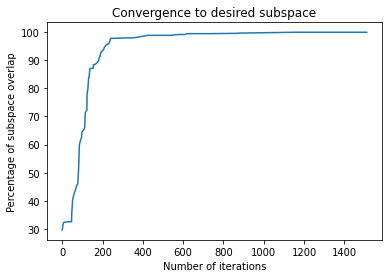

In [108]:
plt.plot(iterations, accuracy)
plt.xlabel('Number of iterations')
plt.ylabel('Percentage of subspace overlap')
plt.title('Convergence to desired subspace')

In [109]:
print(exponents)

[0.681495351359537, 0.10241779472619479, 0.2134144517002437, 0.2087195375476983, 0.06566342100520606, -0.3070028283595339, 0.3016605357615914, -0.07151914867947835, -0.21964495452244107, -0.22746105773643935, -0.10437174282574108, 0.3172635078137357]


<AxesSubplot: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

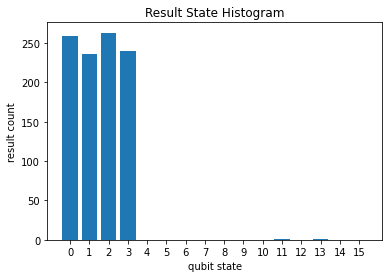

In [110]:
circuit = build_monster_grover(exponents, nDiffuse, measure=True)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = numRepititions)

# get the numbers in the range of the samples
list(cirq.get_state_histogram(samples))
cirq.plot_state_histogram(samples, plt.subplot())